In [23]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [24]:
%cd ./drive/MyDrive/기계학습특론/6주차

[Errno 2] No such file or directory: './drive/MyDrive/기계학습특론/6주차'
/content/drive/MyDrive/기계학습특론/6주차


### 라이브러리 로드

In [25]:
import os

import pandas as pd

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from lightgbm import LGBMClassifier
from lightgbm import plot_importance

import sklearn
from sklearn.utils import shuffle
from sklearn.metrics import accuracy_score
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [26]:
import pandas as pd

df = pd.read_csv('./1.누수감지데이터-통합(leaks-all).csv')
df

,site,sid,ldate,lrate,llevel,leaktype,0HZ,10HZ,20HZ,30HZ,...,MAX10,MAX11,MAX12,MAX13,MAX14,MAX15,MAX16,MAX17,MAX18,MAX19
0,S-2711010100,S-0359369084021423,20200903,90,695,out,0,3,0,3,...,280,741,280,469,270,813,280,644,270,250
1,S-2711010100,S-0359369084021423,20200907,90,261,out,0,5,4,4,...,280,629,280,212,270,234,270,355,270,223
2,S-2711010100,S-0359369084044425,20200704,90,747,out,0,6,6,6,...,410,985,410,596,410,793,410,785,410,846
3,S-2711010100,S-0359369084044425,20200705,90,747,out,0,6,6,6,...,410,758,410,857,420,650,410,907,410,631
4,S-2711010100,S-0359369084044425,20200706,90,825,out,0,6,6,6,...,410,771,410,622,410,894,420,775,410,918
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78199,S-4571025029,S-0359369084052139,20200615,40,148,normal,0,4,4,4,...,270,101,250,461,250,115,260,119,250,167
78200,S-4571025029,S-0359369084052139,20200616,50,146,normal,0,4,4,4,...,250,125,250,102,250,106,250,156,250,141
78201,S-4571025029,S-0359369084052139,20200617,70,326,normal,0,7,7,6,...,250,384,230,862,250,256,260,443,250,283
78202,S-4571025029,S-0359369084052139,20200619,60,388,normal,0,8,8,10,...,260,196,250,85,270,106,270,106,280,56


### Data split

In [27]:
# data split전, y값에 해당하는 데이터를 제외한 나머지 데이터들을 훈련에 사용하기 위해 정리 & concat
data1 = df.iloc[:,6:]
data1

,0HZ,10HZ,20HZ,30HZ,40HZ,50HZ,60HZ,70HZ,80HZ,90HZ,...,MAX10,MAX11,MAX12,MAX13,MAX14,MAX15,MAX16,MAX17,MAX18,MAX19
0,0,3,0,3,3,3,3,5,5,5,...,280,741,280,469,270,813,280,644,270,250
1,0,5,4,4,3,4,4,6,4,6,...,280,629,280,212,270,234,270,355,270,223
2,0,6,6,6,6,6,6,6,6,9,...,410,985,410,596,410,793,410,785,410,846
3,0,6,6,6,6,6,6,8,8,8,...,410,758,410,857,420,650,410,907,410,631
4,0,6,6,6,6,6,6,6,6,9,...,410,771,410,622,410,894,420,775,410,918
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78199,0,4,4,4,4,4,4,3,4,4,...,270,101,250,461,250,115,260,119,250,167
78200,0,4,4,4,4,4,4,4,4,4,...,250,125,250,102,250,106,250,156,250,141
78201,0,7,7,6,7,6,6,6,7,7,...,250,384,230,862,250,256,260,443,250,283
78202,0,8,8,10,8,9,5,10,9,8,...,260,196,250,85,270,106,270,106,280,56


In [28]:
data2 = df.iloc[:,0:5]
data2

,site,sid,ldate,lrate,llevel
0,S-2711010100,S-0359369084021423,20200903,90,695
1,S-2711010100,S-0359369084021423,20200907,90,261
2,S-2711010100,S-0359369084044425,20200704,90,747
3,S-2711010100,S-0359369084044425,20200705,90,747
4,S-2711010100,S-0359369084044425,20200706,90,825
...,...,...,...,...,...
78199,S-4571025029,S-0359369084052139,20200615,40,148
78200,S-4571025029,S-0359369084052139,20200616,50,146
78201,S-4571025029,S-0359369084052139,20200617,70,326
78202,S-4571025029,S-0359369084052139,20200619,60,388


In [29]:
data = pd.concat([data2,data1],axis=1)
data

,site,sid,ldate,lrate,llevel,0HZ,10HZ,20HZ,30HZ,40HZ,...,MAX10,MAX11,MAX12,MAX13,MAX14,MAX15,MAX16,MAX17,MAX18,MAX19
0,S-2711010100,S-0359369084021423,20200903,90,695,0,3,0,3,3,...,280,741,280,469,270,813,280,644,270,250
1,S-2711010100,S-0359369084021423,20200907,90,261,0,5,4,4,3,...,280,629,280,212,270,234,270,355,270,223
2,S-2711010100,S-0359369084044425,20200704,90,747,0,6,6,6,6,...,410,985,410,596,410,793,410,785,410,846
3,S-2711010100,S-0359369084044425,20200705,90,747,0,6,6,6,6,...,410,758,410,857,420,650,410,907,410,631
4,S-2711010100,S-0359369084044425,20200706,90,825,0,6,6,6,6,...,410,771,410,622,410,894,420,775,410,918
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78199,S-4571025029,S-0359369084052139,20200615,40,148,0,4,4,4,4,...,270,101,250,461,250,115,260,119,250,167
78200,S-4571025029,S-0359369084052139,20200616,50,146,0,4,4,4,4,...,250,125,250,102,250,106,250,156,250,141
78201,S-4571025029,S-0359369084052139,20200617,70,326,0,7,7,6,7,...,250,384,230,862,250,256,260,443,250,283
78202,S-4571025029,S-0359369084052139,20200619,60,388,0,8,8,10,8,...,260,196,250,85,270,106,270,106,280,56


Data split전, y값에 해당하는 데이터(leak type)를 분리하고 unique()함수를 통해 output종류를 확인

In [30]:
y_data = df['leaktype']
y_data

0           out
1           out
2           out
3           out
4           out
          ...  
78199    normal
78200    normal
78201    normal
78202    normal
78203    normal
Name: leaktype, Length: 78204, dtype: object

In [31]:
y_data.unique() # 5가지의 레이블

array(['out', 'in', 'noise', 'other', 'normal'], dtype=object)

- data split전, y값에 해당하는 string값들을 int값으로 변경 : 머신러닝 훈련의 용이성을 위함
- value_counts()를 통해 output종류별 데이터 개수 확인

In [32]:
y_data = y_data.replace('out',0)
y_data = y_data.replace('in',1)
y_data = y_data.replace('noise',2)
y_data = y_data.replace('other',3)
y_data = y_data.replace('normal',4)

In [33]:
y_data

0        0
1        0
2        0
3        0
4        0
        ..
78199    4
78200    4
78201    4
78202    4
78203    4
Name: leaktype, Length: 78204, dtype: int64

In [34]:
y_data.value_counts()

4    24628
0    21923
1    16591
3     8775
2     6287
Name: leaktype, dtype: int64

- sklearn의 train_test_split을 이용하여 train, test dataset분할
- 본 예제에서는 8:2로 분할

In [35]:
from sklearn.model_selection import train_test_split

target = y_data

x_train,x_valid,y_train,y_valid = train_test_split(data,target,test_size=0.2,shuffle=True,stratify=target,random_state=42)

In [36]:
print('x_train',x_train.shape)
print('y_train',y_train.shape)
print('x_valid',x_valid.shape)
print('y_valid',y_valid.shape)

x_train (62563, 538)
y_train (62563,)
x_valid (15641, 538)
y_valid (15641,)


### Data preprocessing
- scaling을 위해 min-max scaler 이용
    - 데이터를 0과 1사이의 범위값으로 변환하고 (만약 음수가 포함되어 있다면 -1,1 혹은 -1,0사이로 변환한다.)
    - 데이터의 분포가 정규분포를 따르지 않을 때 min,max scale을 적용해 볼 수 있다.

In [37]:
from sklearn.preprocessing import MinMaxScaler

minmaxscaler = MinMaxScaler()
train_data_scale = minmaxscaler.fit_transform(x_train.iloc[:,3:])



In [38]:
train_data_scale = pd.DataFrame(train_data_scale,columns=x_train.iloc[:,3:].columns)

train_data_scale

,lrate,llevel,0HZ,10HZ,20HZ,30HZ,40HZ,50HZ,60HZ,70HZ,...,MAX10,MAX11,MAX12,MAX13,MAX14,MAX15,MAX16,MAX17,MAX18,MAX19
0,1.000000,0.354964,0.0,0.108434,0.061644,0.072,0.041284,0.035857,0.007371,0.052326,...,0.042339,0.466384,0.042254,0.467972,0.044266,0.328783,0.042254,0.149883,0.042254,0.308642
1,1.000000,0.093446,0.0,0.060241,0.034247,0.048,0.027523,0.019920,0.004914,0.034884,...,0.042339,0.141732,0.042254,0.156584,0.042254,0.141246,0.042254,0.142272,0.042254,0.390359
2,1.000000,0.260870,0.0,0.048193,0.027397,0.032,0.009174,0.015936,0.003276,0.023256,...,0.056452,0.215021,0.056338,0.388493,0.056338,0.143027,0.056338,0.388173,0.056338,0.388007
3,1.000000,0.178456,0.0,0.349398,0.260274,0.280,0.155963,0.139442,0.031941,0.244186,...,0.899194,0.217444,0.897384,0.259193,0.897384,0.181009,0.891348,0.223653,0.901408,0.264550
4,1.000000,0.072680,0.0,0.060241,0.027397,0.040,0.022936,0.011952,0.004095,0.034884,...,0.054435,0.232586,0.052314,0.157177,0.052314,0.102671,0.052314,0.095433,0.054326,0.124045
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62558,1.000000,0.177158,0.0,0.036145,0.006849,0.032,0.018349,0.015936,0.004095,0.029070,...,0.044355,0.213810,0.040241,0.147094,0.044266,0.239169,0.044266,0.228337,0.040241,0.211640
62559,1.000000,0.494484,0.0,0.000000,0.000000,0.000,0.000000,0.000000,0.002457,0.017442,...,0.042339,0.578437,0.042254,0.510083,0.042254,0.553709,0.042254,0.533958,0.042254,0.489712
62560,1.000000,0.109669,0.0,0.048193,0.027397,0.032,0.013761,0.015936,0.002457,0.023256,...,0.054435,0.216838,0.054326,0.141163,0.054326,0.259347,0.056338,0.144028,0.054326,0.138742
62561,0.000000,0.271252,0.0,0.048193,0.034247,0.040,0.022936,0.019920,0.004095,0.029070,...,0.062500,0.006663,0.060362,0.482206,0.060362,0.129377,0.062374,0.003513,0.963783,0.001176


In [39]:
test_data_scale = minmaxscaler.fit_transform(x_valid.iloc[:,3:])
test_data_scale = pd.DataFrame(test_data_scale,columns=x_valid.iloc[:,3:].columns)

test_data_scale

,lrate,llevel,0HZ,10HZ,20HZ,30HZ,40HZ,50HZ,60HZ,70HZ,...,MAX10,MAX11,MAX12,MAX13,MAX14,MAX15,MAX16,MAX17,MAX18,MAX19
0,1.000000,0.228517,0.0,0.186047,0.191011,0.140351,0.130890,0.074534,0.025726,0.242647,...,0.070707,0.199757,0.066532,0.176883,0.066667,0.285968,0.064777,0.178010,0.070423,0.282941
1,1.000000,0.440484,0.0,0.034884,0.033708,0.026316,0.015707,0.009317,0.002490,0.022059,...,0.052525,0.481481,0.048387,0.497957,0.048485,0.497336,0.050607,0.470622,0.050302,0.378235
2,0.166667,0.056015,0.0,0.046512,0.056180,0.035088,0.026178,0.015528,0.003320,0.029412,...,0.072727,0.101396,0.068548,0.201985,0.068687,0.008289,0.068826,0.118092,0.070423,0.052353
3,0.000000,0.053469,0.0,0.058140,0.056180,0.043860,0.031414,0.018634,0.014108,0.036765,...,0.969697,0.001214,0.056452,0.004086,0.369697,0.002368,0.807692,0.001745,0.058350,0.010000
4,1.000000,0.173138,0.0,0.116279,0.146067,0.114035,0.083770,0.049689,0.013278,0.117647,...,0.898990,0.224651,0.885081,0.212493,0.882828,0.236827,0.880567,0.214078,0.893360,0.215882
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15636,1.000000,0.505411,0.0,0.046512,0.078652,0.035088,0.036649,0.021739,0.005809,0.051471,...,0.048485,0.630844,0.046371,0.514886,0.046465,0.539964,0.046559,0.496219,0.048290,0.567647
15637,0.666667,0.077021,0.0,0.058140,0.044944,0.035088,0.026178,0.012422,0.003320,0.022059,...,0.044444,0.148148,0.042339,0.134267,0.042424,0.118413,0.042510,0.124491,0.044266,0.165294
15638,0.666667,0.035010,0.0,0.034884,0.033708,0.035088,0.020942,0.012422,0.003320,0.029412,...,0.050505,0.111718,0.048387,0.071804,0.048485,0.098283,0.048583,0.108202,0.050302,0.067647
15639,1.000000,0.252705,0.0,0.046512,0.044944,0.052632,0.020942,0.018634,0.005809,0.044118,...,0.048485,0.171220,0.046371,0.329247,0.046465,0.361753,0.046559,0.306574,0.046278,0.355294


scale된 data병합 및 정리

In [40]:
train_data_scale = train_data_scale.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)


In [41]:
traindata = pd.concat([train_data_scale,y_train],axis=1)
traindata

,lrate,llevel,0HZ,10HZ,20HZ,30HZ,40HZ,50HZ,60HZ,70HZ,...,MAX11,MAX12,MAX13,MAX14,MAX15,MAX16,MAX17,MAX18,MAX19,leaktype
0,1.000000,0.354964,0.0,0.108434,0.061644,0.072,0.041284,0.035857,0.007371,0.052326,...,0.466384,0.042254,0.467972,0.044266,0.328783,0.042254,0.149883,0.042254,0.308642,0
1,1.000000,0.093446,0.0,0.060241,0.034247,0.048,0.027523,0.019920,0.004914,0.034884,...,0.141732,0.042254,0.156584,0.042254,0.141246,0.042254,0.142272,0.042254,0.390359,2
2,1.000000,0.260870,0.0,0.048193,0.027397,0.032,0.009174,0.015936,0.003276,0.023256,...,0.215021,0.056338,0.388493,0.056338,0.143027,0.056338,0.388173,0.056338,0.388007,0
3,1.000000,0.178456,0.0,0.349398,0.260274,0.280,0.155963,0.139442,0.031941,0.244186,...,0.217444,0.897384,0.259193,0.897384,0.181009,0.891348,0.223653,0.901408,0.264550,0
4,1.000000,0.072680,0.0,0.060241,0.027397,0.040,0.022936,0.011952,0.004095,0.034884,...,0.232586,0.052314,0.157177,0.052314,0.102671,0.052314,0.095433,0.054326,0.124045,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62558,1.000000,0.177158,0.0,0.036145,0.006849,0.032,0.018349,0.015936,0.004095,0.029070,...,0.213810,0.040241,0.147094,0.044266,0.239169,0.044266,0.228337,0.040241,0.211640,0
62559,1.000000,0.494484,0.0,0.000000,0.000000,0.000,0.000000,0.000000,0.002457,0.017442,...,0.578437,0.042254,0.510083,0.042254,0.553709,0.042254,0.533958,0.042254,0.489712,2
62560,1.000000,0.109669,0.0,0.048193,0.027397,0.032,0.013761,0.015936,0.002457,0.023256,...,0.216838,0.054326,0.141163,0.054326,0.259347,0.056338,0.144028,0.054326,0.138742,1
62561,0.000000,0.271252,0.0,0.048193,0.034247,0.040,0.022936,0.019920,0.004095,0.029070,...,0.006663,0.060362,0.482206,0.060362,0.129377,0.062374,0.003513,0.963783,0.001176,4


In [42]:
test_data_scale = test_data_scale.reset_index(drop=True)
y_valid = y_valid.reset_index(drop=True)


In [43]:
testdata = pd.concat([test_data_scale,y_valid],axis=1)
testdata

,lrate,llevel,0HZ,10HZ,20HZ,30HZ,40HZ,50HZ,60HZ,70HZ,...,MAX11,MAX12,MAX13,MAX14,MAX15,MAX16,MAX17,MAX18,MAX19,leaktype
0,1.000000,0.228517,0.0,0.186047,0.191011,0.140351,0.130890,0.074534,0.025726,0.242647,...,0.199757,0.066532,0.176883,0.066667,0.285968,0.064777,0.178010,0.070423,0.282941,3
1,1.000000,0.440484,0.0,0.034884,0.033708,0.026316,0.015707,0.009317,0.002490,0.022059,...,0.481481,0.048387,0.497957,0.048485,0.497336,0.050607,0.470622,0.050302,0.378235,0
2,0.166667,0.056015,0.0,0.046512,0.056180,0.035088,0.026178,0.015528,0.003320,0.029412,...,0.101396,0.068548,0.201985,0.068687,0.008289,0.068826,0.118092,0.070423,0.052353,4
3,0.000000,0.053469,0.0,0.058140,0.056180,0.043860,0.031414,0.018634,0.014108,0.036765,...,0.001214,0.056452,0.004086,0.369697,0.002368,0.807692,0.001745,0.058350,0.010000,4
4,1.000000,0.173138,0.0,0.116279,0.146067,0.114035,0.083770,0.049689,0.013278,0.117647,...,0.224651,0.885081,0.212493,0.882828,0.236827,0.880567,0.214078,0.893360,0.215882,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15636,1.000000,0.505411,0.0,0.046512,0.078652,0.035088,0.036649,0.021739,0.005809,0.051471,...,0.630844,0.046371,0.514886,0.046465,0.539964,0.046559,0.496219,0.048290,0.567647,0
15637,0.666667,0.077021,0.0,0.058140,0.044944,0.035088,0.026178,0.012422,0.003320,0.022059,...,0.148148,0.042339,0.134267,0.042424,0.118413,0.042510,0.124491,0.044266,0.165294,4
15638,0.666667,0.035010,0.0,0.034884,0.033708,0.035088,0.020942,0.012422,0.003320,0.029412,...,0.111718,0.048387,0.071804,0.048485,0.098283,0.048583,0.108202,0.050302,0.067647,4
15639,1.000000,0.252705,0.0,0.046512,0.044944,0.052632,0.020942,0.018634,0.005809,0.044118,...,0.171220,0.046371,0.329247,0.046465,0.361753,0.046559,0.306574,0.046278,0.355294,1


### LightGBM
- Model training
    - Gridsearch방법을 이용하여 하이퍼 파라미터 탐색
    - Cross validation(CV)=5
    - LightGBMClassifier객체에 대해, greedy한 탐색을 통해 최적의 하이퍼 파라미터를 찾도록 함

In [45]:
from sklearn.model_selection import GridSearchCV
from lightgbm import LGBMClassifier

lgb = LGBMClassifier(random_state=42)

lgb_paramgrid={
    'learning_rate': [0.2],
    'n_estimators': [1000],
    'max_depth':[10],
    'boosting_type' : ['dart'], # for better accuracy -> try dart
   }
# best value 선택함

lgb_grid = GridSearchCV(lgb,param_grid=lgb_paramgrid,scoring='accuracy',verbose=3,cv=2).fit(train_data_scale,y_train)

Fitting 2 folds for each of 1 candidates, totalling 2 fits
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.322167 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 66628
[LightGBM] [Info] Number of data points in the train set: 31281, number of used features: 534
[LightGBM] [Info] Start training from score -1.271788
[LightGBM] [Info] Start training from score -1.550502
[LightGBM] [Info] Start training from score -2.520738
[LightGBM] [Info] Start training from score -2.187395
[LightGBM] [Info] Start training from score -1.155438
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits wit

In [46]:
lgb_pred = lgb_grid.predict(test_data_scale)

print('Test Accuracy: % f' % accuracy_score(y_valid,lgb_pred))

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
Test Accuracy:  0.879995


In [47]:
lgb_grid.best_params_

{'boosting_type': 'dart',
 'learning_rate': 0.2,
 'max_depth': 10,
 'n_estimators': 1000}

In [48]:
for i in range(10):
    print('True:',y_valid[i],'Predict:',lgb_pred[i])

True: 3 Predict: 3
True: 0 Predict: 0
True: 4 Predict: 4
True: 4 Predict: 4
True: 1 Predict: 1
True: 1 Predict: 0
True: 4 Predict: 4
True: 0 Predict: 0
True: 1 Predict: 0
True: 2 Predict: 2


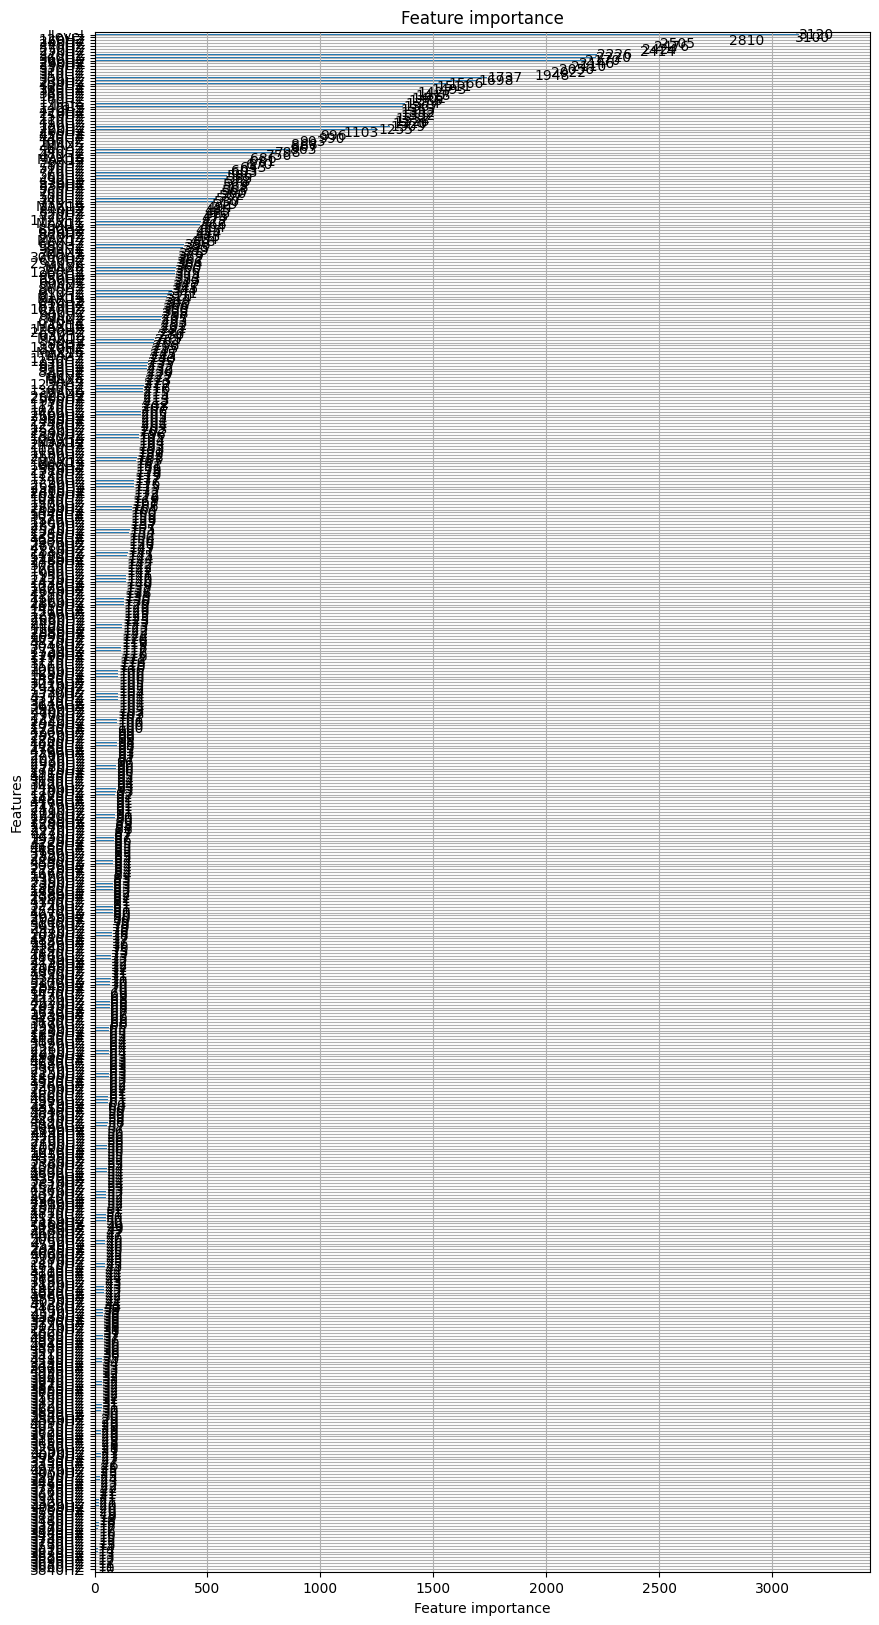

In [53]:
# 피처 중요도 시각화
plot_importance(lgb_grid.best_estimator_, figsize=(10, 20))
plt.show()
